In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Dataset = pd.read_csv('train_news.csv')

In [2]:
Dataset.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
#Removing duplicates
Dataset.drop_duplicates(inplace = True)

In [4]:
#check for null values
Dataset.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [5]:
Dataset.shape

(20800, 6)

In [6]:
#drop null values
d1 = Dataset.dropna()
d1.shape

(18285, 6)

In [7]:
d2 = d1.copy()

In [8]:
d2.reset_index(inplace=True)

In [9]:
d2['headline'][6]

'Alabama Prison Officials Retaliate Against Prison Strike Leader By Cutting Water To Cell'

In [10]:
#Text Cleaning
import re
import string

from nltk.corpus import stopwords

# Using Lemmatizer.
from nltk.stem import WordNetLemmatizer
WL = WordNetLemmatizer()

corpus = []

for i in range(0, len(d2)):
    
    #Remove Unicode characters
    #TITLE = re.sub(r'[^\x00-\x7F]+', '', TITLE)
    TITLE = re.sub('[^a-zA-Z]', ' ', d2['headline'][i])

    #Convert to lowercase to maintain consistency
    TITLE = TITLE.lower()
    TITLE = TITLE.split()
    TITLE = [WL.lemmatize(word) for word in TITLE if not word in stopwords.words('english')]

    TITLE = ' '.join(TITLE)
    corpus.append(TITLE)

In [11]:
corpus

['ethic question dogged agriculture nominee georgia governor new york time',
 'u must dig deep stop argentina lionel messi new york time',
 'cotton house walk plank vote bill cannot pas senate breitbart',
 'paul lepage besieged maine governor sends conflicting signal intention new york time',
 'digital trump win',
 'rapid evolution saved fish pollution study say new york time',
 'alabama prison official retaliate prison strike leader cutting water cell',
 'live constant state love',
 'hillary closet drunk new wikileak email reveals aid asking sober day',
 'bloomberg backed pennsylvania attorney general sentenced month prison',
 'video le pen pelted egg keep smiling',
 'donald trump candidate american special interest',
 'wharton business school backer seek distance donald trump new york time',
 'brexit ruling latest tactic block people',
 'million south korean rise shadow government',
 'chelsea manning asks obama cut sentence time served new york time',
 'city vow fight trump immigrati

In [19]:
## Applying TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(max_features=5000, ngram_range=(1,1))
X=vec.fit_transform(corpus).toarray()

In [13]:
X.shape

(18285, 5000)

In [14]:
print(vec.vocabulary_)

{'ethic': 1505, 'question': 3555, 'agriculture': 101, 'nominee': 3030, 'georgia': 1878, 'governor': 1928, 'new': 3000, 'york': 4985, 'time': 4530, 'must': 2936, 'dig': 1256, 'deep': 1162, 'stop': 4281, 'argentina': 247, 'cotton': 1017, 'house': 2136, 'walk': 4827, 'vote': 4816, 'bill': 455, 'cannot': 655, 'pas': 3210, 'senate': 3980, 'breitbart': 553, 'paul': 3229, 'maine': 2688, 'sends': 3984, 'signal': 4085, 'digital': 1257, 'trump': 4631, 'win': 4916, 'rapid': 3598, 'evolution': 1529, 'saved': 3900, 'fish': 1711, 'pollution': 3362, 'study': 4317, 'say': 3903, 'alabama': 122, 'prison': 3453, 'official': 3094, 'strike': 4306, 'leader': 2519, 'cutting': 1099, 'water': 4852, 'cell': 711, 'live': 2615, 'constant': 961, 'state': 4249, 'love': 2652, 'hillary': 2077, 'drunk': 1355, 'email': 1424, 'reveals': 3755, 'aid': 106, 'asking': 275, 'day': 1135, 'bloomberg': 485, 'backed': 349, 'pennsylvania': 3251, 'attorney': 316, 'general': 1870, 'sentenced': 3989, 'month': 2883, 'video': 4787, 'l

In [15]:
print(vec.idf_)

[9.02213155 9.02213155 8.41599575 ... 8.86798087 8.41599575 8.51130593]


In [16]:
print(vec.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 5000, 'min_df': 1, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}


In [17]:
feature_names = vec.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features: {}".format(feature_names[:20]))
print("Every 2000th feature: {}".format(feature_names[::2000]))

Number of features: 5000
First 20 features: ['aaron', 'ab', 'abandon', 'abandoned', 'abbas', 'abc', 'abduction', 'abe', 'abedin', 'able', 'aboard', 'abolish', 'abortion', 'abroad', 'absolutely', 'abstains', 'absurd', 'abu', 'abuse', 'abused']
Every 2000th feature: ['aaron', 'hand', 'serve']


In [18]:
y=d2['label']

In [20]:
## Divide the dataset into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [56]:
# Instantiate Decision Tree for classification
Dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10,
                                  max_features = 'sqrt', criterion = 'entropy')

# Fit the classifier to the training data
Dec_tree.fit(X_train, y_train)

# make predictions for test data
y_pred = Dec_tree.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.60%


In [57]:
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,3335,78
fake,2300,322


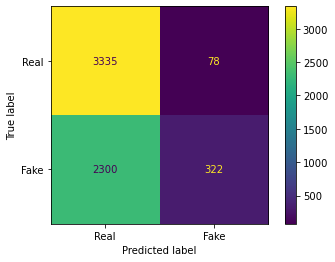

In [58]:
target_names = ['Real', 'Fake']

plot_confusion_matrix(Dec_tree, X_test, y_test, display_labels=target_names)
plt.show()

In [59]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.59      0.98      0.74      3413
        Fake       0.81      0.12      0.21      2622

    accuracy                           0.61      6035
   macro avg       0.70      0.55      0.48      6035
weighted avg       0.68      0.61      0.51      6035



In [60]:
# Instantiate Random Forest for classification
R_forest = RandomForestClassifier(bootstrap = True, max_depth=10, 
                                  min_samples_leaf=10,
                                  criterion = 'entropy', random_state=42)

# Fit the classifier to the training data
R_forest.fit(X_train, y_train)

# make predictions for test data
y_pred = R_forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.48%


In [61]:
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,3223,190
fake,626,1996


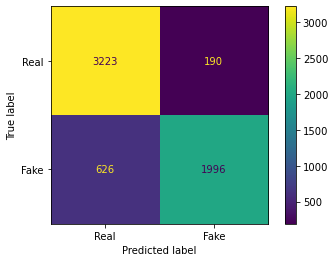

In [62]:
target_names = ['Real', 'Fake']
plot_confusion_matrix(R_forest, X_test, y_test, display_labels=target_names)
plt.show()

In [63]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.84      0.94      0.89      3413
        Fake       0.91      0.76      0.83      2622

    accuracy                           0.86      6035
   macro avg       0.88      0.85      0.86      6035
weighted avg       0.87      0.86      0.86      6035

